# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [1]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [2]:
versioninfo()

Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto


In [4]:
import Pkg; Pkg.add("BenchmarkTools")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed BenchmarkTools ─ v1.6.0
    Updating `~/.julia/environments/v1.10/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [9abbd945] + Profile
Precompiling packages...
   2815.3 ms  ✓ BenchmarkTools
  1 dependency successfully precompiled in 13 seconds. 460 already precompiled.


In [5]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  540.599 ms (2 allocations: 32.00 MiB)


In [ ]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

In [12]:
#Pkg.add("OrdinaryDiffEq")

using LinearAlgebra
using OrdinaryDiffEq
using ForwardDiff
using Plots


In [10]:
Pkg.add("ForwardDiff")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
⌅ [f6369f11] + ForwardDiff v0.10.38
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [26]:
g = 9.81
m = 1.0
l = 1.0
J = 0.5*m*l*l

0.5

In [13]:
function kinematics(q)
 r = [0.5*l*sin(q[1]); -0.5*l*cos(q[1]); q[1];
 l*sin(q[1]) + 0.5*l*sin(q[1]+q[2]); -l*cos(q[1]) - 0.5*l*cos(q[1]+q[2]);q[1]+q[2]]
 end

kinematics (generic function with 1 method)

In [16]:
function potential(q)
    r = kinematics(q)
    y1 = r[2]
    y2 = r[5]

    U = m*g*(y1 + y2)
end

potential (generic function with 1 method)

In [24]:
function kinetic(q, qdot)

K = ForwardDiff.jacobian(kinematics, q)
rdot = K*qdot
T = 0.5*rdot'*Diagonal([m;m;J;m;m;J])*rdot
end

kinetic (generic function with 1 method)

In [18]:
function Lagrangian(q, qdot)
  return kinetic(q, qdot) - potential(q)
end


Lagrangian (generic function with 1 method)

In [20]:
function D1L(q, qdot)
  return ForwardDiff.gradient(dq->Lagrangian(dq, qdot), q)
end

function D2L(q, qdot)
  return ForwardDiff.gradient(dqdot->Lagrangian(q, dqdot), qdot)
end

function D2D2L(q, qdot)
  return ForwardDiff.jacobian(dqdot->D2L(q,dqdot), qdot)
end

function D1D2L(q, qdot)
  return ForwardDiff.jacobian(dq->D2L(dq, qdot), q)
end

D1D2L (generic function with 1 method)

In [21]:
function dynamics(x, tau)
  q = x[1:2]
  qdot = x[3:4]

  qddot = D2D2L(q, qdot)\(D1L(q, qdot) - D1D2L(q, qdot)*qdot + tau)
  xdot = [qdot;qddot]
end


dynamics (generic function with 1 method)

In [30]:
function controller(x)
  q = x[1:2]
  qdot = x[3:4]
  kp = 100.0
  kd = 10.0
  u = -kp*(q-[pi;0.0]) - kd*qdot
end


controller (generic function with 1 method)

In [31]:
x0 = randn(4)
function f(x, p, t)
  #u = zeros(2)
  u = controller(x)
  dynamics(x,u)
end

tspan = (0.0, 10.0)
prob = ODEProblem(f, x0, tspan)
sol = solve(prob, Tsit5(), abstol=1e-6, reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 169-element Vector{Float64}:
  0.0
  0.0015319486319337302
  0.0043349018919167995
  0.0076433387712024035
  0.01192726388503413
  0.016886850706969818
  0.022631033195327947
  0.028980845577780145
  0.03591425355107535
  0.04337279306509277
  0.05146061708266339
  0.06061774679716671
  0.07065387055233491
  ⋮
  7.8727968099188494
  8.069942087936154
  8.303210910580406
  8.563674599981127
  8.811114841527948
  9.046846785579072
  9.24931437129403
  9.402570883613425
  9.545965937176161
  9.722776443974608
  9.996315890398304
 10.0
u: 169-element Vector{Vector{Float64}}:
 [-0.050382599247435135, 0.8342196273155041, -0.8049830612225286, -0.2614344796184662]
 [-0.05129156378478462, 0.8332216715443055, -0.3841024915260648, -1.0352377490689286]
 [-0.05132896629277241, 0.8284380878904246, 0.34984605687993575, -2.358769467127508]
 [-0.04881511685286033, 0.8182436187512492, 1.1600719642863355, -3.779574602966547]
 [

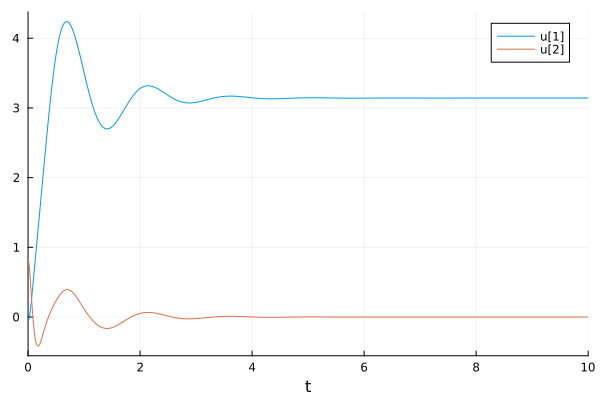

In [32]:
plot(sol, idxs=(0,1))
plot!(sol, idxs=(0,2))

Apply a force in the x direction of at the end of the second link.  

In [34]:
function y(q)
  return l*sin(q[1]) + l*sin(q[1]+q[2])
end

function Y(q)
  ForwardDiff.gradient(dq->y(dq), q)'
  end

Y (generic function with 1 method)

In [35]:
function dynamics(x, F)
  q = x[1:2]
  qdot = x[3:4]

  #damping constant
  c = 10.0
  qddot = D2D2L(q, qdot)\(D1L(q, qdot) - D1D2L(q, qdot)*qdot - c*qdot + Y(q)'*F)
  xdot = [qdot;qddot]
end


dynamics (generic function with 1 method)

In [38]:
x0 = zeros(4)
function f(x, p, t)
  F = 10.0
  dynamics(x, F)
end


tspan = (0.0, 10.0)
prob = ODEProblem(f, x0, tspan)
sol = solve(prob, Tsit5(), abstol=1e-6, reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 148-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.003625884953045875
  0.006978180608048319
  0.0110466523501064
  0.01592938828841097
  0.021570041503306454
  0.027997811828314952
  0.035191441436189366
  0.04316971721495873
  0.05194373212346076
  0.06155033527803212
  ⋮
  8.93275297546584
  9.037604093263955
  9.14245802021693
  9.247314598944556
  9.352173683245828
  9.457035136501574
  9.561898824482402
  9.66676462174334
  9.7716324036319
  9.876502047087989
  9.98137345302524
 10.0
u: 148-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [1.1780375571523066e-8, 4.701180770243698e-8, 0.00023576404259212234, 0.0009397664254253597]
 [1.444166811725476e-6, 5.632107222201719e-6, 0.002644301777531727, 0.010184385280839923]
 [1.6186935933327988e-5, 5.969756741177893e-5, 0.009119569337948111, 0.03234928024452491]
 [6.224449673929185e-5, 0.00021413187406237508, 0.018499

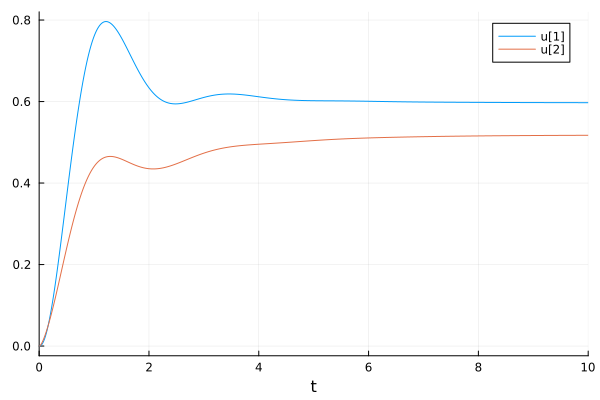

In [39]:
plot(sol, idxs=(0,1))
plot!(sol, idxs=(0,2))